In [29]:
from data import prepare_3d_dataloaders
from models import NLinear
from utils import Config
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

In [37]:
seq_len = 24
pred_len = 96
n_channels = 3

train_loader, val_loader, test_loader = prepare_3d_dataloaders(batch_size=8, seq_len=seq_len, pred_len=pred_len, n_channels=n_channels)

nlinear = NLinear(Config(seq_len=seq_len, pred_len=pred_len, n_channels=n_channels))
nlinear.cuda()


preparing data3d...
done preparing data3d


NLinear(
  (linear): ModuleList(
    (0-2): 3 x Linear(in_features=24, out_features=96, bias=True)
  )
)

In [38]:
tli = iter(train_loader)
for i in range(100):
    batch = next(tli)
x,y = batch
x = x.cuda()
y = y.cuda()
x.shape,y.shape

(torch.Size([8, 24, 3]), torch.Size([8, 96, 3]))

In [12]:
y_hat = nlinear.forward(x)
y_hat.shape

torch.Size([8, 1, 3])

In [13]:
y

tensor([[[  1.0724, 333.4085,  19.7509]],

        [[  1.1286, 338.2799,  20.3234]],

        [[  1.1276, 334.9824,  20.9630]],

        [[  1.1178, 332.3256,  20.4907]],

        [[  1.1132, 327.2790,  19.2461]],

        [[  1.1254, 319.8542,  18.1337]],

        [[  1.0870, 323.3980,  17.5411]],

        [[  1.1297, 324.8519,  17.7253]]], device='cuda:0',
       dtype=torch.float64)

In [14]:
y_hat

tensor([[[  1.2881, 339.2560,  21.0322]],

        [[  1.2657, 338.4501,  20.7917]],

        [[  1.2797, 337.7162,  20.5053]],

        [[  1.2967, 321.5578,  20.2981]],

        [[  1.2974, 326.4244,  20.1478]],

        [[  1.2940, 338.3836,  20.4075]],

        [[  1.2718, 344.6643,  21.0154]],

        [[  1.2846, 347.5431,  21.3955]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<AddBackward0>)

In [15]:
F.mse_loss(y_hat, y)

tensor(62.6138, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)

In [45]:

nlinear = NLinear(Config(seq_len=seq_len, pred_len=pred_len, n_channels=n_channels))
nlinear.cuda()

losses = []
optimizer = torch.optim.Adam(nlinear.parameters(), lr=1e-4)

for _ in range(20):

    print(len(nlinear.training_step_losses))

    tli = iter(train_loader)
    while True:
        batch = next(tli, None)
        if batch is None:
            break
        optimizer.zero_grad()
        loss = nlinear.training_step(batch, 0)
        loss.backward()
        optimizer.step()

    print(len(nlinear.training_step_losses))
    _losses = [e.item() for e in nlinear.training_step_losses]
    loss = sum(_losses) / len(_losses)
    losses.append(loss)
    nlinear.training_step_losses.clear()

0


c:\Users\nak-o\miniconda3\envs\ds\lib\site-packages\lightning\pytorch\core\module.py:407: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(


6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270
0
6270


In [46]:
losses

[296.69031417605913,
 270.22497621021614,
 266.0020441246135,
 263.8768211823139,
 262.55232802795774,
 261.6370972562828,
 260.96129486103877,
 260.4380749649951,
 260.0185610688298,
 259.6731910848716,
 259.38298707801454,
 259.1351408476789,
 258.920641095937,
 258.7329275016804,
 258.5670889212923,
 258.4193638960889,
 258.2868167079619,
 258.1671196771408,
 258.0584022669484,
 257.95914368944756]

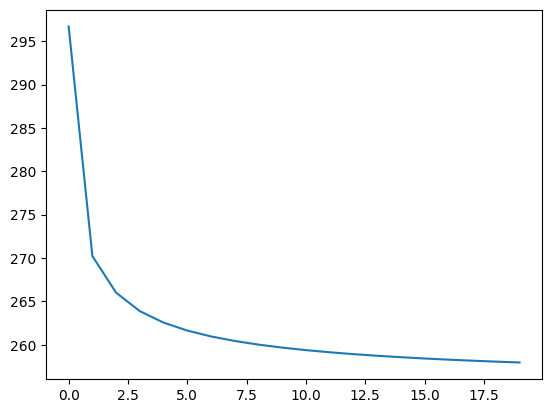

In [47]:
plt.plot(range(len(losses)), losses)

In [31]:
losses = [e.item() for e in nlinear.training_step_losses]

In [32]:
sum(losses)/len(losses)

35.58397290443858

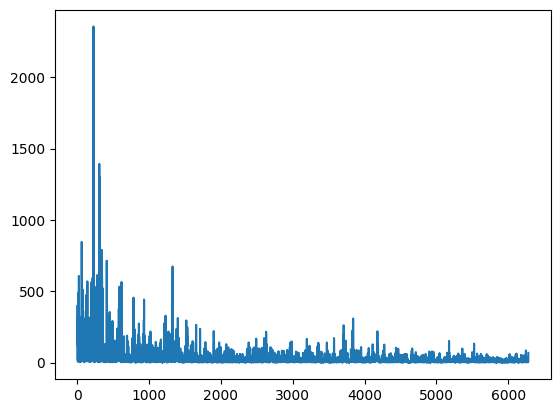

In [33]:
plt.plot(range(len(losses)), losses)